## Lets try create a model using Decision tree regressor and check the r2_scores for mutiple parameters
## Decision tree regressor creates a tree like structure by splitting the data set based on each most important features derived based on features/columns that has low Entrpy and high information gain

In [1]:
# import all important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [2]:
# import the data set

data = pd.read_csv(r"C:\Users\Vinoth\Desktop\HOPE AI\Machine Learning\Finding the Best Model for 50 Startups Data set by Tuning HyperParameters\DataSet\50_Startups.csv")

In [3]:
data.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


In [4]:
# check for NA values in data set

data[data.isna().any(axis=1)]

,R&D Spend,Administration,Marketing Spend,State,Profit


In [5]:
# Check for any null values in data set
data[data.isnull().any(axis=1)]

,R&D Spend,Administration,Marketing Spend,State,Profit


In [6]:
# change the "State" category column values to numeric values usig get_dummies method from pandas
# Get_dummies implements On-Hot-Encoding since the column "state" is nominal category (Means that column values cannot be compared)

data = pd.get_dummies(data,drop_first=True)

In [7]:
data.head(2)

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.2,136897.80,471784.10,192261.83,0,1
1,162597.7,151377.59,443898.53,191792.06,0,0


In [8]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

In [9]:
# change the order of the columns for better visibility

data = data.loc[:,['R&D Spend', 'Administration', 'Marketing Spend','State_Florida', 'State_New York','Profit']]


In [10]:
data.head(3)

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York,Profit
0,165349.20,136897.80,471784.10,0,1,192261.83
1,162597.70,151377.59,443898.53,0,0,191792.06
2,153441.51,101145.55,407934.54,1,0,191050.39


In [11]:
# split dependent and independent variables to create,train and test the model

independent= data[['R&D Spend', 'Administration', 'Marketing Spend','State_Florida', 'State_New York']]
dependent = data[['Profit']]

In [12]:
independent.head(3)

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0


In [13]:
dependent.head(3)

,Profit
0,192261.83
1,191792.06
2,191050.39


In [14]:
# lets split the data's to train and test from the data set.
# so that we can train the model with training data and test the model with test data set
X_Train,X_Test,Y_Train,Y_Test = train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [15]:
X_Train.shape

(35, 5)

In [16]:
X_Test.shape

(15, 5)

In [17]:
# Now lets create a decision tree regressor model using training data

Decision_Tree_Regressor_Model = DecisionTreeRegressor()
Decision_Tree_Regressor_Model.fit(X_Train,Y_Train)


DecisionTreeRegressor()

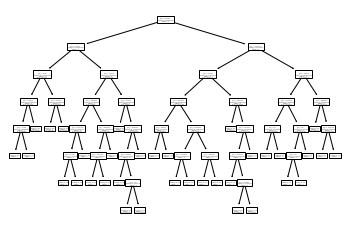

In [18]:
# From above code we have created a decision tree but lets confirm and see how the tree looks like
from sklearn import tree
tree.plot_tree(Decision_Tree_Regressor_Model)
plt.show()

In [19]:
# Lets not wait to test the model using our test data

Predicted_Y = Decision_Tree_Regressor_Model.predict(X_Test)

In [20]:
# now we can check how correctly our model has predicted the y(output values) using r2_score metric

R2_Score = r2_score(Y_Test,Predicted_Y)


In [21]:
R2_Score

0.9002436283783096

# Great that we have model that predicts with almost 93% accuracy
## But if you can observe that State columns after converting it to numerical values the units/scales of values differs from other columns
## so lets try to standardize the values of every column into same variance so that our model can calculate the distances very easily and can perform better

In [22]:
from sklearn.preprocessing import StandardScaler
X_Train_Std = StandardScaler()
X_Train = X_Train_Std.fit_transform(X_Train)

In [23]:
X_Test = X_Train_Std.transform(X_Test)

In [24]:
X_Train

array([[ 1.17644103,  0.84515251,  0.94354978,  2.        , -0.76870611],
       [ 0.96420324,  1.27283565,  0.42738817,  2.        , -0.76870611],
       [-1.47369826,  0.0153175 , -1.52350329, -0.5       ,  1.30088727],
       [-1.48308929, -2.79556363, -1.53809178, -0.5       ,  1.30088727],
       [-0.14952431,  1.13637282, -0.71716495, -0.5       ,  1.30088727],
       [ 0.85312042, -0.04431628,  0.46771725, -0.5       ,  1.30088727],
       [-0.22353674, -0.3151007 , -0.83981652,  2.        , -0.76870611],
       [-0.19454707,  0.21199679, -1.18497259, -0.5       , -0.76870611],
       [ 0.10478723, -0.08388412,  0.48740807, -0.5       , -0.76870611],
       [-1.0096458 , -1.07019473, -0.4040623 , -0.5       , -0.76870611],
       [ 0.06872897, -0.38396487,  0.75036616, -0.5       , -0.76870611],
       [-1.17638797,  0.14067421, -1.26581817, -0.5       ,  1.30088727],
       [ 0.97648631,  0.9689421 ,  0.84958395, -0.5       ,  1.30088727],
       [ 0.39131191,  0.45560401,  0.3

In [25]:
X_Test

array([[-0.1403821 ,  2.28593993, -0.63280437,  2.        , -0.76870611],
       [ 0.5692117 , -1.24096039,  0.37552686, -0.5       , -0.76870611],
       [ 0.59465017, -0.51102691,  0.21780907,  2.        , -0.76870611],
       [-0.92249538, -1.51579286, -0.27786722,  2.        , -0.76870611],
       [ 1.65079661, -0.87781077,  1.58762665,  2.        , -0.76870611],
       [-0.01625436,  0.15939469,  1.16810991, -0.5       ,  1.30088727],
       [-1.07956593, -2.24414796, -0.11853428, -0.5       ,  1.30088727],
       [-0.24112469,  1.1235571 , -0.86213689, -0.5       ,  1.30088727],
       [ 0.02242149, -0.03787582,  0.78603258,  2.        , -0.76870611],
       [ 1.41848712, -1.25644297,  1.26760194,  2.        , -0.76870611],
       [-0.3567741 , -0.80359112,  0.10650537,  2.        , -0.76870611],
       [-0.55107837, -1.50272366,  0.03664684, -0.5       ,  1.30088727],
       [ 0.04977002,  0.79103569, -0.5109594 ,  2.        , -0.76870611],
       [-0.54263284,  1.31734166,  0.0

In [129]:
Decision_Tree_Regressor_Model_Trsf = DecisionTreeRegressor(splitter='random',criterion='friedman_mse',max_features='auto')
Decision_Tree_Regressor_Model_Trsf.fit(X_Train,Y_Train)

C:\Users\Vinoth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(criterion='friedman_mse', max_features='auto',
                      splitter='random')

In [130]:
Predicted_Y_trnsf = Decision_Tree_Regressor_Model_Trsf.predict(X_Test)

In [131]:
R2_Score_trsf = r2_score(Y_Test,Predicted_Y_trnsf)

In [132]:
R2_Score_trsf

0.9664189620755586